# Importing libraries

In [35]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Importing data

In [9]:
# Import the data file
path=r'C:\Users\asicz\OneDrive\Dokumenty\CareerFoundry_Data_Analyst_Course\Data Immersion\Achievement 6'
evo_data=pd.read_csv(os.path.join(path, 'Evolution_DataSets.csv'), index_col = False)

# Consistency check
### Check the data shape, consistency and if necessary do the data cleaning

In [12]:
evo_data.shape

(12000, 28)

In [14]:
evo_data.head()

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,Torus_Supraorbital,Prognathism,Foramen_Mágnum_Position,Canine Size,Canines_Shape,Tooth_Enamel,Tecno,Tecno_type,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,very protruding,high,posterior,big,conicalls,thick,no,no,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,very protruding,high,semi-anterior,small,conicalls,thick-medium,no,no,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,very protruding,high,anterior,big,incisiform,thick,no,no,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,Australopithecus Anamensis,4.595606,Africa,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,very protruding,high,anterior,big,incisiform,thick,no,no,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
4,Australopithecus Africanus,3.614060,Africa,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,very protruding,medium-high,anterior,small,incisiform,thick,no,no,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light


In [16]:
# Show variables
evo_data.columns

Index(['Genus_&_Specie', 'Time', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape',
       'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position',
       'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type',
       'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip',
       'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton'],
      dtype='object')

In [18]:
# Check data types
evo_data.dtypes

Genus_&_Specie              object
Time                       float64
Location                    object
Zone                        object
Current_Country             object
Habitat                     object
Cranial_Capacity           float64
Height                     float64
Incisor_Size                object
Jaw_Shape                   object
Torus_Supraorbital          object
Prognathism                 object
Foramen_Mágnum_Position     object
Canine Size                 object
Canines_Shape               object
Tooth_Enamel                object
Tecno                       object
Tecno_type                  object
biped                       object
Arms                        object
Foots                       object
Diet                        object
Sexual_Dimorphism           object
Hip                         object
Vertical_Front              object
Anatomy                     object
Migrated                    object
Skeleton                    object
dtype: object

In [20]:
# Check for mixed data types
for col in evo_data.columns.tolist():
  weird = (evo_data[[col]].map(type) != evo_data[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (evo_data[weird]) > 0:
    print (col)

print(evo_data.dtypes)

Genus_&_Specie              object
Time                       float64
Location                    object
Zone                        object
Current_Country             object
Habitat                     object
Cranial_Capacity           float64
Height                     float64
Incisor_Size                object
Jaw_Shape                   object
Torus_Supraorbital          object
Prognathism                 object
Foramen_Mágnum_Position     object
Canine Size                 object
Canines_Shape               object
Tooth_Enamel                object
Tecno                       object
Tecno_type                  object
biped                       object
Arms                        object
Foots                       object
Diet                        object
Sexual_Dimorphism           object
Hip                         object
Vertical_Front              object
Anatomy                     object
Migrated                    object
Skeleton                    object
dtype: object


In [22]:
# Find missing values
print('Missing values: ' ,evo_data.isnull().sum())

Missing values:  Genus_&_Specie             0
Time                       0
Location                   0
Zone                       0
Current_Country            0
Habitat                    0
Cranial_Capacity           0
Height                     0
Incisor_Size               0
Jaw_Shape                  0
Torus_Supraorbital         0
Prognathism                0
Foramen_Mágnum_Position    0
Canine Size                0
Canines_Shape              0
Tooth_Enamel               0
Tecno                      0
Tecno_type                 0
biped                      0
Arms                       0
Foots                      0
Diet                       0
Sexual_Dimorphism          0
Hip                        0
Vertical_Front             0
Anatomy                    0
Migrated                   0
Skeleton                   0
dtype: int64


In [31]:
# Check for duplicated records
evo_data.duplicated().sum()

0

# Exploring data

In [25]:
# Check the basic statistics of numerical data
evo_data.describe()

,Time,Cranial_Capacity,Height
count,12000.000000,12000.000000,12000.000000
mean,2.532665,616.824303,131.452198
std,1.776998,356.275762,24.539191
min,0.000529,0.074910,80.009030
25%,1.050566,334.430993,112.986802
50%,2.317031,511.320200,125.508305
75%,3.656959,919.807697,153.877355
max,7.699417,1448.397470,184.981450


In [27]:
# Increase the max columns to display
pd.set_option('display.max_columns', None)

# Check if all the variables in the dataframe will be useful
print(evo_data.head())

                            Genus_&_Specie      Time Location      Zone  \
0              hominino Orrorin tugenencin  6.041124   Africa  oriental   
1  hominino Ardipithecus ramidus / kabadda  4.383910   Africa  oriental   
2               Australopithecus Afarensis  3.749413   Africa  oriental   
3               Australopithecus Anamensis  4.595606   Africa  oriental   
4               Australopithecus Africanus  3.614060   Africa     south   

  Current_Country         Habitat  Cranial_Capacity     Height Incisor_Size  \
0           Kenya          forest         144.51410  110.24323        small   
1        Ethiopia           mixed         293.96021  107.69018        small   
2           Kenya           mixed         264.79849  123.76644          big   
3           Kenya  forest-gallery         403.28047  111.40831          big   
4    South Africa  forest-gallery         679.15233  111.59004        small   

  Jaw_Shape Torus_Supraorbital  Prognathism Foramen_Mágnum_Position  \
0  

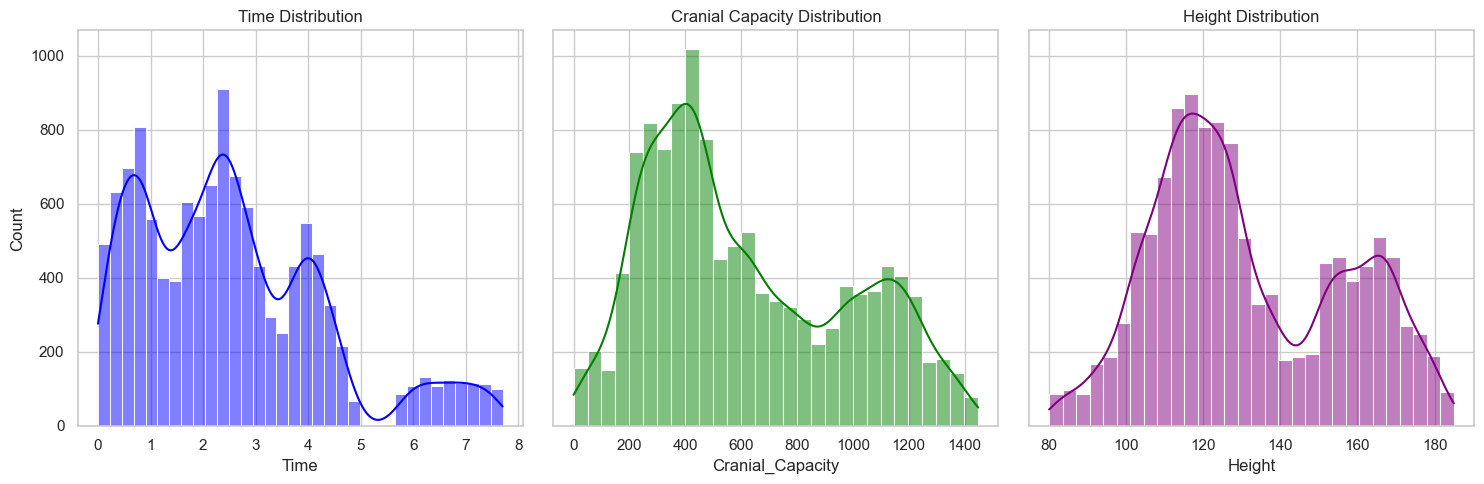

In [37]:
# Chech the distribution of the Time component, Cranial capacity and Height (all the numerical values)
# Set the style for seaborn
sns.set(style="whitegrid")

# Create individual histograms for each numerical column
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)  # One row, three plots

# Plot histograms
sns.histplot(data=evo_data, x='Time', kde=True, ax=axes[0], color='blue')
axes[0].set_title('Time Distribution')

sns.histplot(data=evo_data, x='Cranial_Capacity', kde=True, ax=axes[1], color='green')
axes[1].set_title('Cranial Capacity Distribution')

sns.histplot(data=evo_data, x='Height', kde=True, ax=axes[2], color='purple')
axes[2].set_title('Height Distribution')

plt.tight_layout()
plt.show()


Counts for Genus_&_Specie:

Genus_&_Specie
hominino Orrorin tugenencin                500
hominino Ardipithecus ramidus / kabadda    500
Paranthropus Robustus                      500
Australopithecus Garhi                     500
Australopithecus Bahrelghazali             500
Homo Georgicus                             500
Australopithecus Sediba                    500
Homo Ergaster                              500
Homo Antecesor                             500
Homo Sapiens                               500
Homo Habilis                               500
Homo Rudolfensis                           500
Paranthropus Boisei                        500
Homo Floresiensis                          500
Homo Naledi                                500
Homo Erectus                               500
Paranthropus Aethiopicus                   500
Homo Neanderthalensis\n                    500
hominino Sahelanthropus tchadensis         500
Homo Rodhesiensis                          500
Australopithecus 

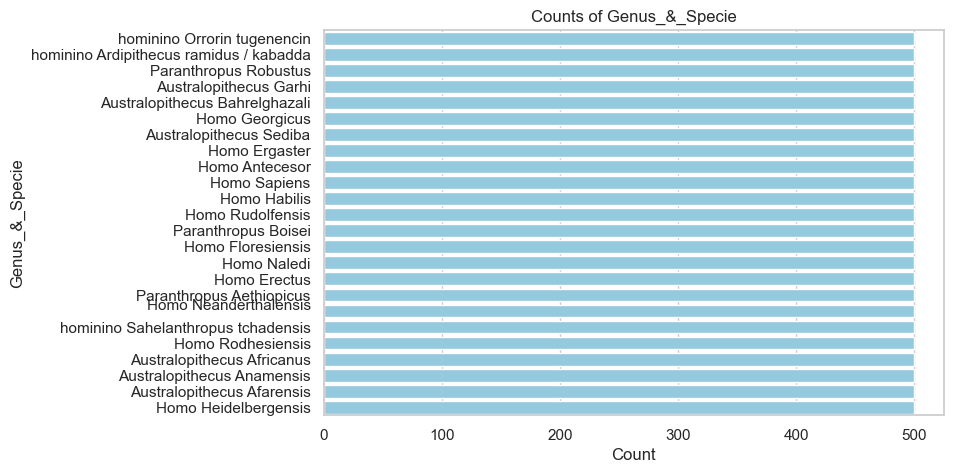

Counts for Location:

Location
Africa    9000
Europa    1500
Asia      1500
Name: count, dtype: int64

----------------------------------------



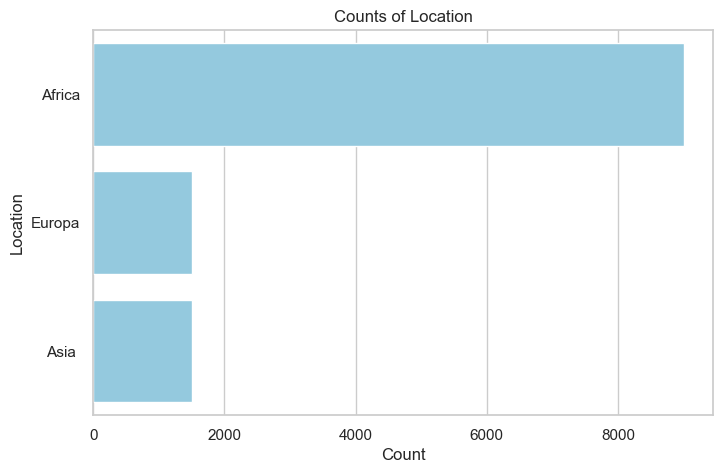

Counts for Zone:

Zone
oriental    6500
south       2000
central     2000
west        1500
Name: count, dtype: int64

----------------------------------------



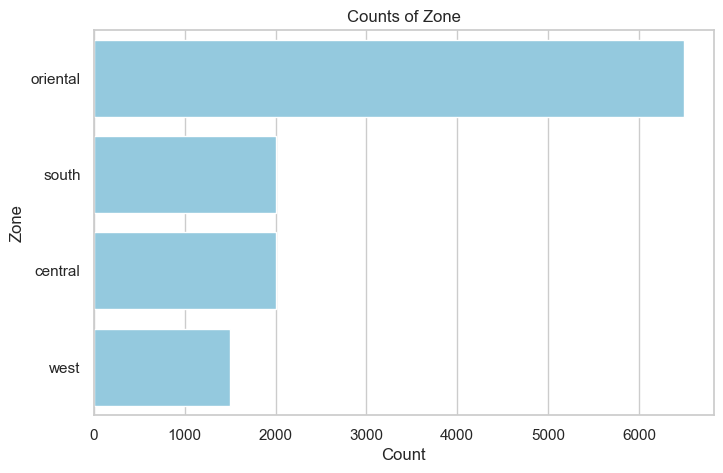

Counts for Current_Country:

Current_Country
Kenya               3500
Ethiopia            2500
South Africa        2000
Republic of Chad    1000
Germany             1000
Indonesia           1000
Spain                500
Georgia              500
Name: count, dtype: int64

----------------------------------------



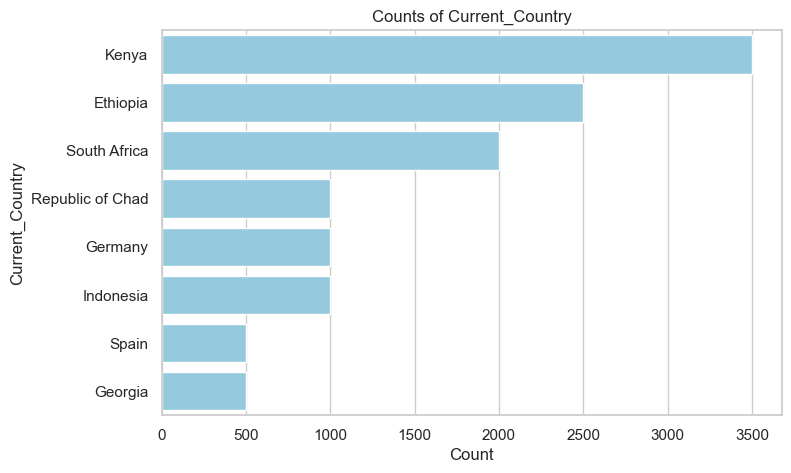

Counts for Habitat:

Habitat
savannah          4000
mixed             3000
forest            1000
forest-gallery    1000
cold forest       1000
jungle            1000
forest-savanna     500
peninsular         500
Name: count, dtype: int64

----------------------------------------



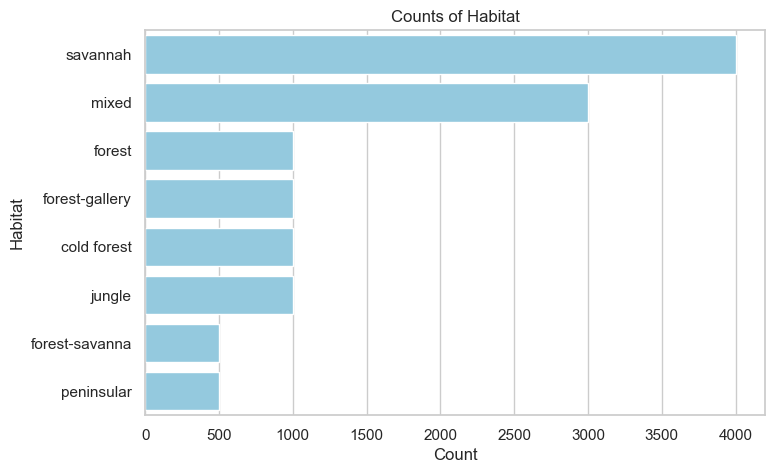

Counts for Incisor_Size:

Incisor_Size
small           5000
big             3000
megadony        1500
very small      1500
medium large    1000
Name: count, dtype: int64

----------------------------------------



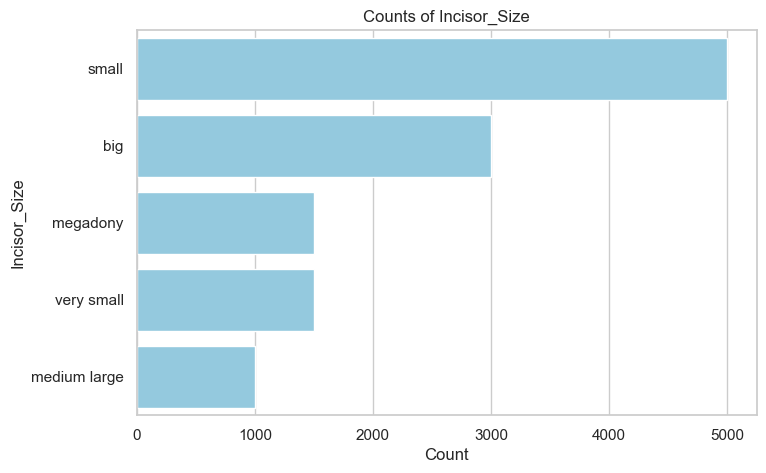

Counts for Jaw_Shape:

Jaw_Shape
U shape    6000
modern     2500
conical    2000
V shape    1500
Name: count, dtype: int64

----------------------------------------



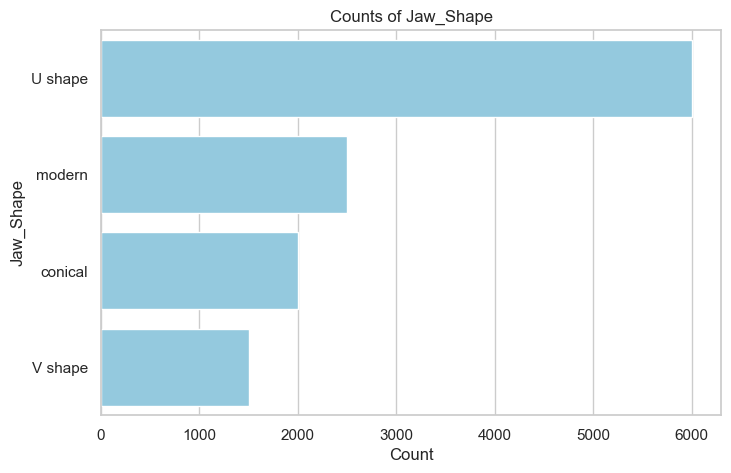

Counts for Torus_Supraorbital:

Torus_Supraorbital
very protruding      5500
little protruding    3500
ultra protruding     1500
less protruding      1000
flat                  500
Name: count, dtype: int64

----------------------------------------



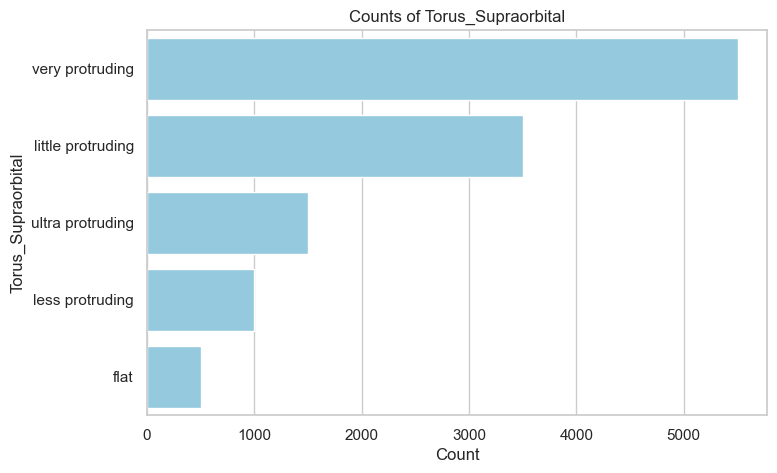

Counts for Prognathism:

Prognathism
medium-high    4000
high           2500
reduced        2000
very high      1500
medium         1500
absent          500
Name: count, dtype: int64

----------------------------------------



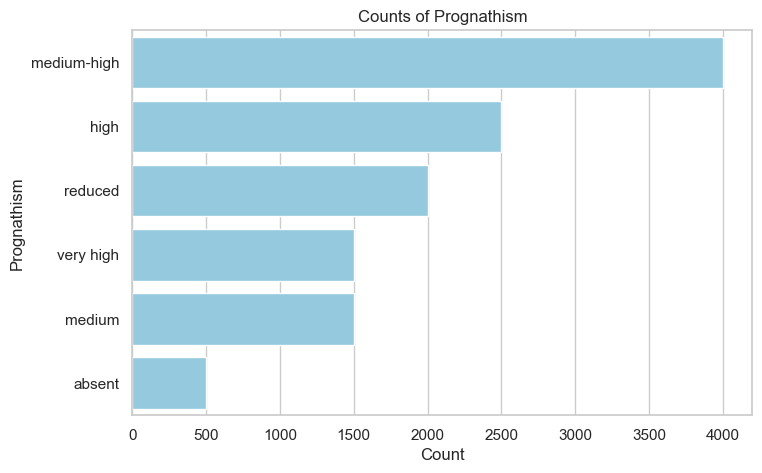

Counts for Foramen_Mágnum_Position:

Foramen_Mágnum_Position
anterior         4500
modern           4500
semi-anterior    2000
posterior        1000
Name: count, dtype: int64

----------------------------------------



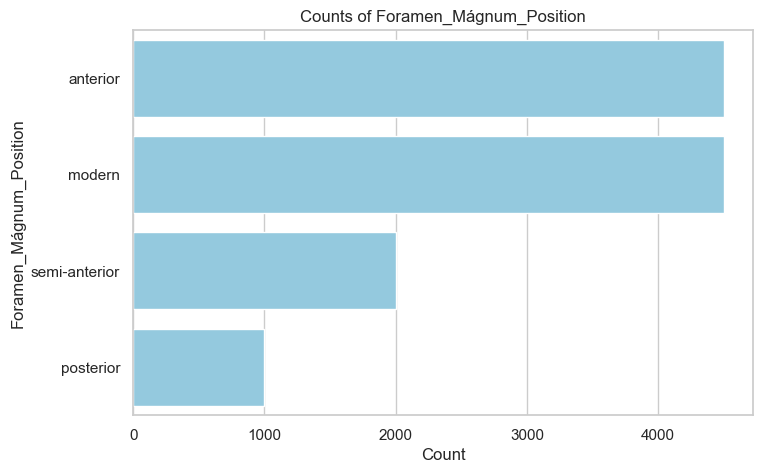

Counts for Canine Size:

Canine Size
small    6500
big      5500
Name: count, dtype: int64

----------------------------------------



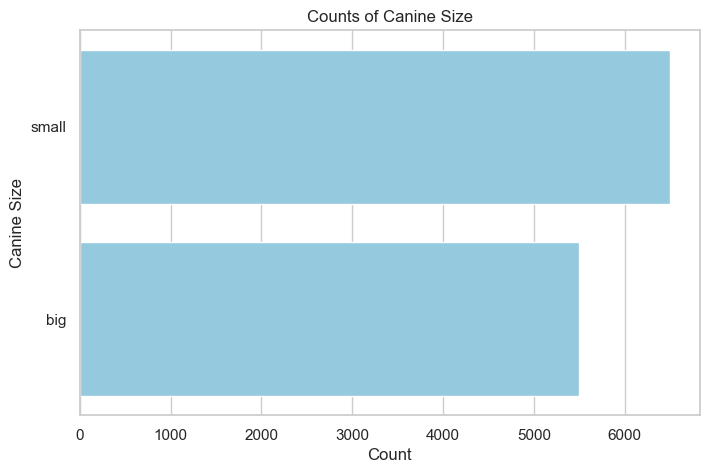

Counts for Canines_Shape:

Canines_Shape
incisiform    7000
conicalls     5000
Name: count, dtype: int64

----------------------------------------



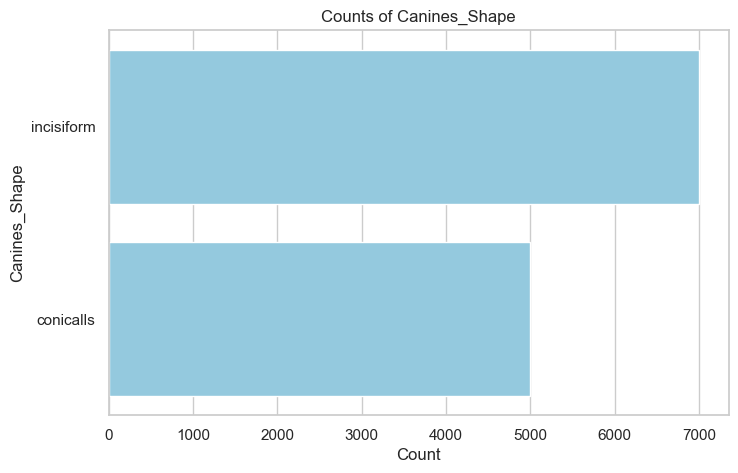

Counts for Tooth_Enamel:

Tooth_Enamel
thick           4500
medium-thin     3000
very thick      1500
medium-thick    1000
thin            1000
thick-medium     500
very thin        500
Name: count, dtype: int64

----------------------------------------



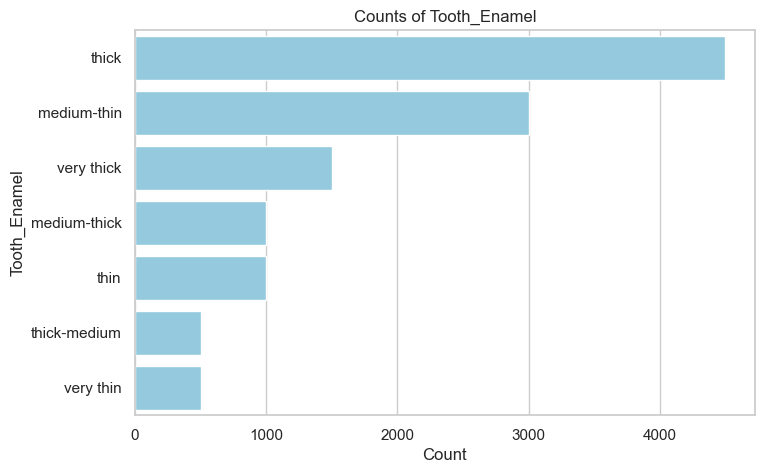

Counts for Tecno:

Tecno
no        6500
yes       5000
likely     500
Name: count, dtype: int64

----------------------------------------



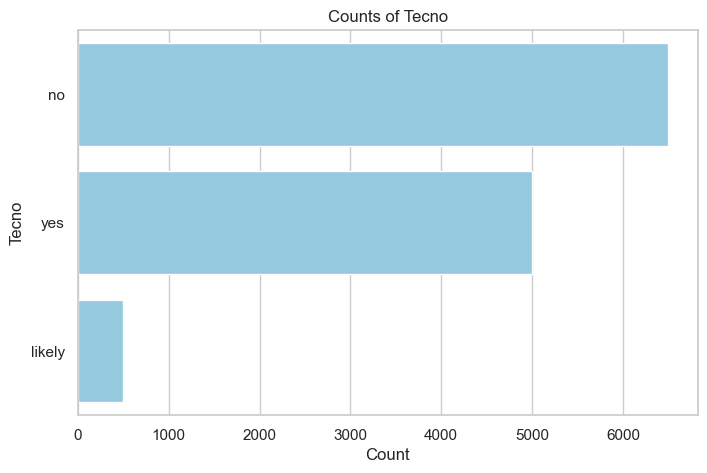

Counts for Tecno_type:

Tecno_type
no           6500
mode 1       2500
mode 2       1500
mode 3        500
mode 4        500
primitive     500
Name: count, dtype: int64

----------------------------------------



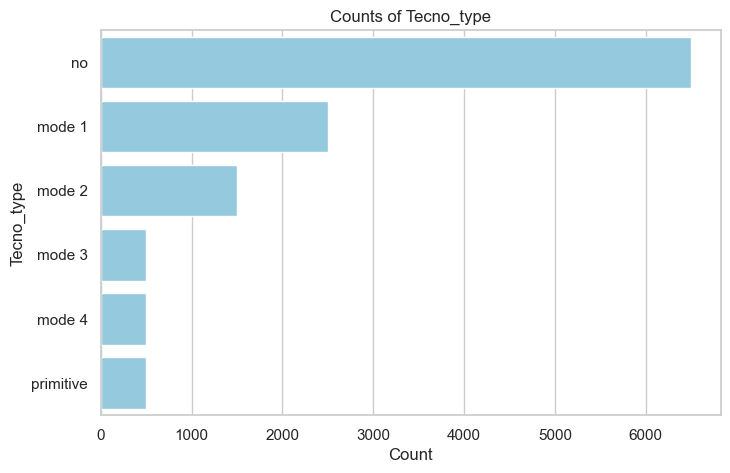

Counts for biped:

biped
modern              5500
yes                 5000
low probability     1000
high probability     500
Name: count, dtype: int64

----------------------------------------



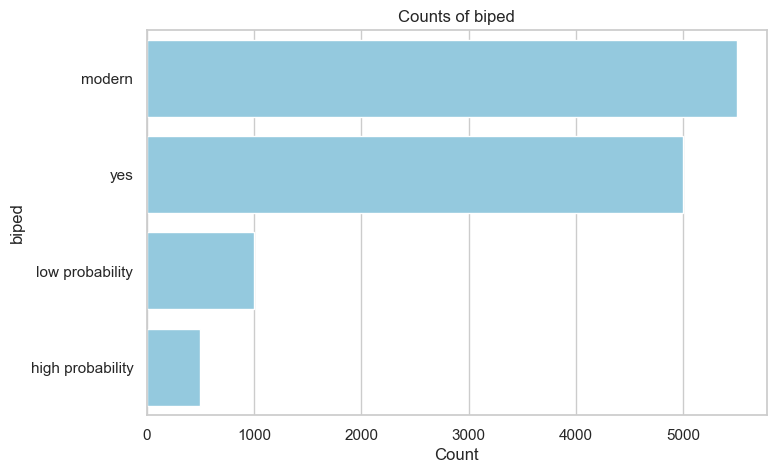

Counts for Arms:

Arms
climbing                     7500
manipulate                   2500
manipulate with precision    2000
Name: count, dtype: int64

----------------------------------------



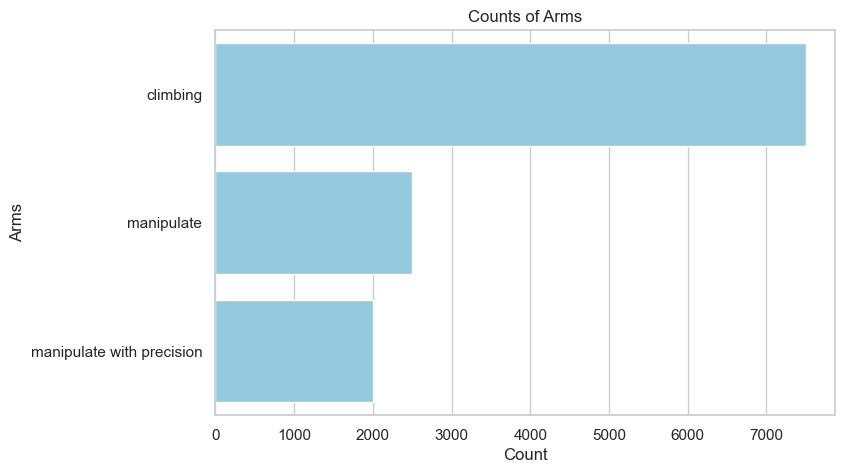

Counts for Foots:

Foots
walk        7500
climbing    4500
Name: count, dtype: int64

----------------------------------------



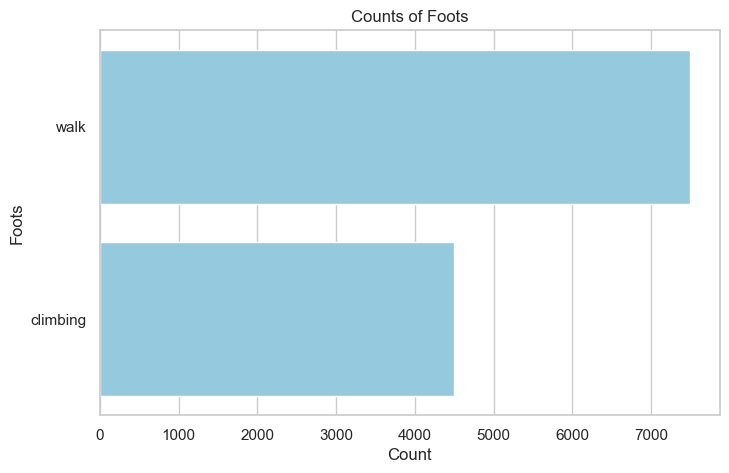

Counts for Diet:

Diet
omnivore       4500
dry fruits     3000
hard fruits    2000
carnivorous    1500
soft fruits    1000
Name: count, dtype: int64

----------------------------------------



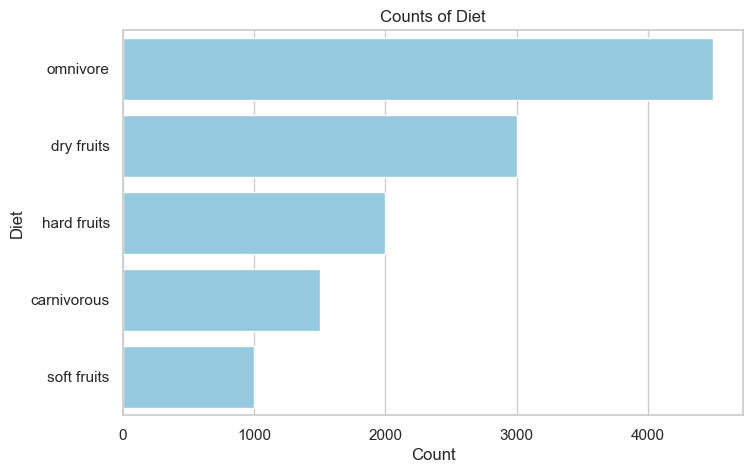

Counts for Sexual_Dimorphism:

Sexual_Dimorphism
high           6000
medium-high    5500
reduced         500
Name: count, dtype: int64

----------------------------------------



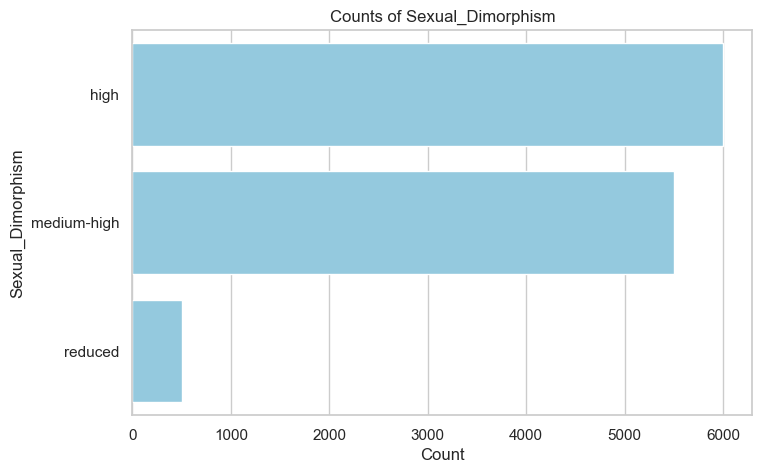

Counts for Hip:

Hip
wide           5000
slim           3000
modern         2500
very modern    1500
Name: count, dtype: int64

----------------------------------------



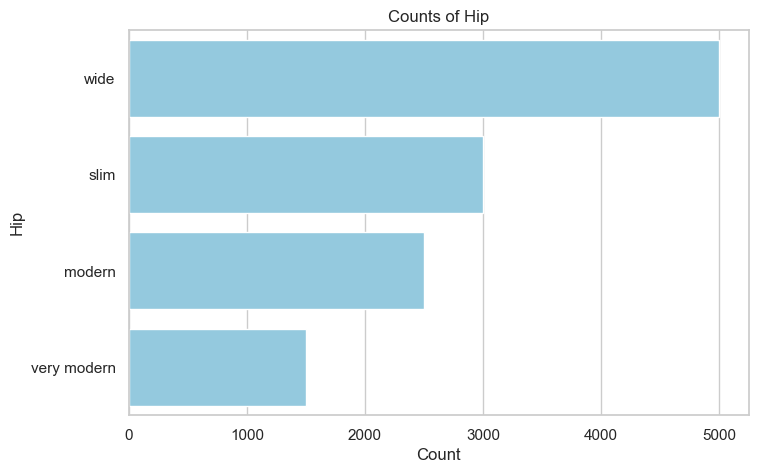

Counts for Vertical_Front:

Vertical_Front
no        7000
modern    3500
yes       1500
Name: count, dtype: int64

----------------------------------------



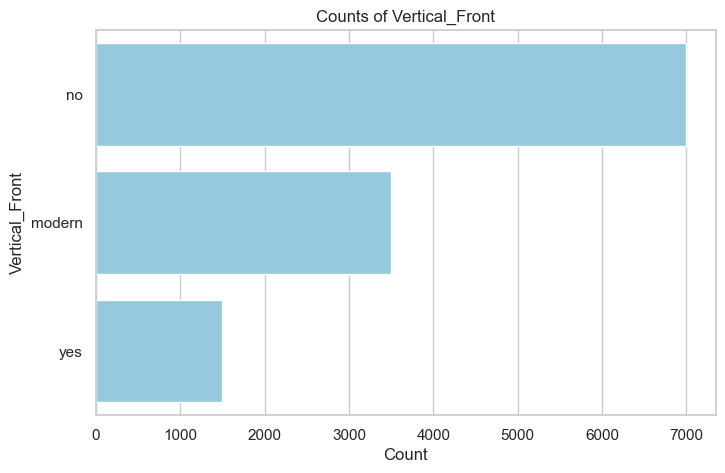

Counts for Anatomy:

Anatomy
old            5500
mixed          3000
modern         2000
very modern    1500
Name: count, dtype: int64

----------------------------------------



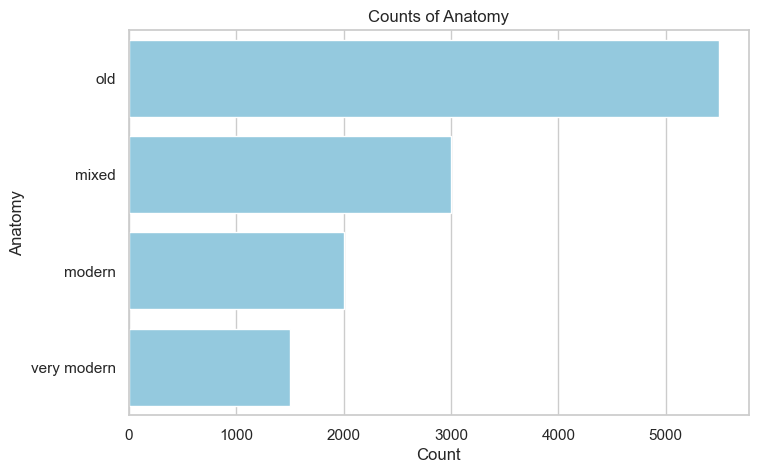

Counts for Migrated:

Migrated
no     9000
yes    3000
Name: count, dtype: int64

----------------------------------------



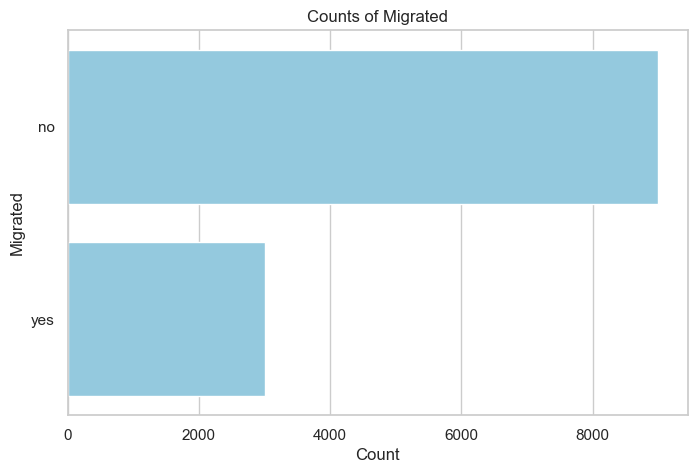

Counts for Skeleton:

Skeleton
light      5500
robust     5000
refined    1500
Name: count, dtype: int64

----------------------------------------



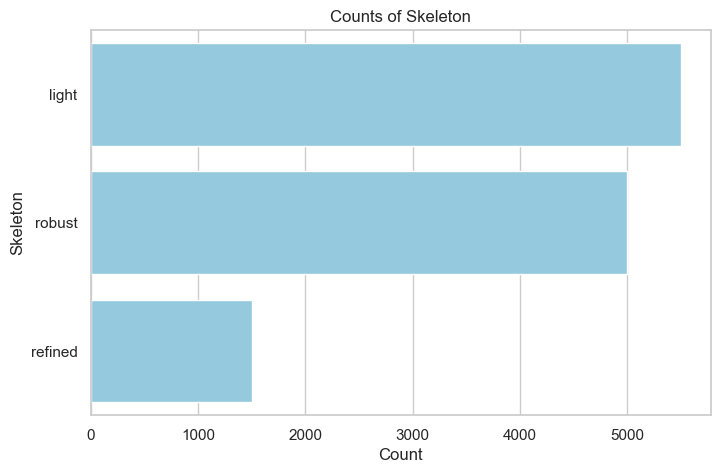

In [43]:
# Check the number of observations in each categorical variable
# Select only categorical columns (dtype = object)
categorical_columns = evo_data.select_dtypes(include='object').columns

# Loop through each categorical column
for column in categorical_columns:
    print(f"Counts for {column}:\n")
    print(evo_data[column].value_counts())  # Display counts
    print("\n" + "-"*40 + "\n")
    
    # Plot bar chart with uniform bar color
    plt.figure(figsize=(8, 5))
    sns.countplot(
        data=evo_data, 
        y=column, 
        order=evo_data[column].value_counts().index,
        color="skyblue"  # Use a single color for all bars
    )
    plt.title(f"Counts of {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.show()

In [51]:
# I've noticed that the column Genus & Specie is a typo and should be Genus & Species, I also want to change names of few other columns to stay consistent and more understandable
evo_data.rename(columns={
    "Genus_&_Specie": "Genus_&_Species",
    "biped": "Bipedalism",
    "Foots" : "Feet",
    "Tecno" : "Technology",
    "Tecno_type" : "Technology_type"
}, inplace=True)
print(evo_data.columns)

Index(['Genus_&_Species', 'Time', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape',
       'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position',
       'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Technology',
       'Technology_type', 'Bipedalism', 'Arms', 'Feet', 'Diet',
       'Sexual_Dimorphism', 'Hip', 'Vertical_Front', 'Anatomy', 'Migrated',
       'Skeleton'],
      dtype='object')


In [53]:
# Export the corrected data to a CSV file
evo_data.to_csv("corrected_evo_data.csv", index=False)